# Proyek Machine Learning
M. Ardifa Rizqi Ramadhan

## Import Library

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Import Dataset

In [54]:
url = 'https://raw.githubusercontent.com/ardifa24/Machine-Learning-Terapan/refs/heads/main/Proyek-Pertama/CarPricesPrediction.csv'
carPrices = pd.read_csv(url)
carPrices.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


## Data Understanding

In [55]:
# Menghapus Kolom Unnamed: 0, karena hanya index dari file CSV
carPrices = carPrices.drop('Unnamed: 0', axis=1)

In [56]:
carPrices.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [57]:
carPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


Berdasarkan informasi diatas menunjukan bahwa:
*  Tipe data object menunjukkan bahwa kolom tersebut berisi data kategorikal dan perlu dikodekan (misalnya dengan One Hot Encoding) sebelum digunakan dalam pemodelan machine learning.
*  Tidak terdapat data yang hilang (Non-Null Count = 1000 untuk semua kolom).

*  Dataset ini cocok untuk kasus regresi, karena target (Price) bersifat kontinu.

In [58]:
carPrices.describe()

,Year,Mileage,Price
count,1000.00000,1000.000000,1000.000000
mean,2015.86500,78796.927000,22195.205650
std,3.78247,39842.259941,4245.191585
min,2010.00000,10079.000000,12613.000000
25%,2013.00000,44942.750000,18961.862500
50%,2016.00000,78056.500000,22247.875000
75%,2019.00000,112366.250000,25510.275000
max,2022.00000,149794.000000,31414.900000


Berdasarkan informasi diatas menunjukkan bahwa:
*  Tahun mobil berkisar antara 2010 hingga 2022, dengan median di 2016. Ini menunjukkan mayoritas mobil relatif baru.
*  Kisaran jarak tempuh sangat bervariasi (10 ribu hingga hampir 150 ribu km), menunjukkan dataset mencakup mobil baru hingga cukup tua.
*  Harga mobil tersebar antara sekitar 12 ribu hingga 31 ribu, dengan rata-rata sekitar 22 ribu. Ini cocok untuk kasus regresi harga mobil.

In [59]:
carPrices.isnull().sum()

,0
Make,0
Model,0
Year,0
Mileage,0
Condition,0
Price,0


Tidak terdapat missing values pada keenam kolom (Make, Model, Year, Mileage, Condition, dan Price) dalam dataset.

In [60]:
carPrices.duplicated().sum()

np.int64(0)

Tidak terdapat baris data yang duplikat di dalam dataset carPrice

Mengecek nilai Outlier

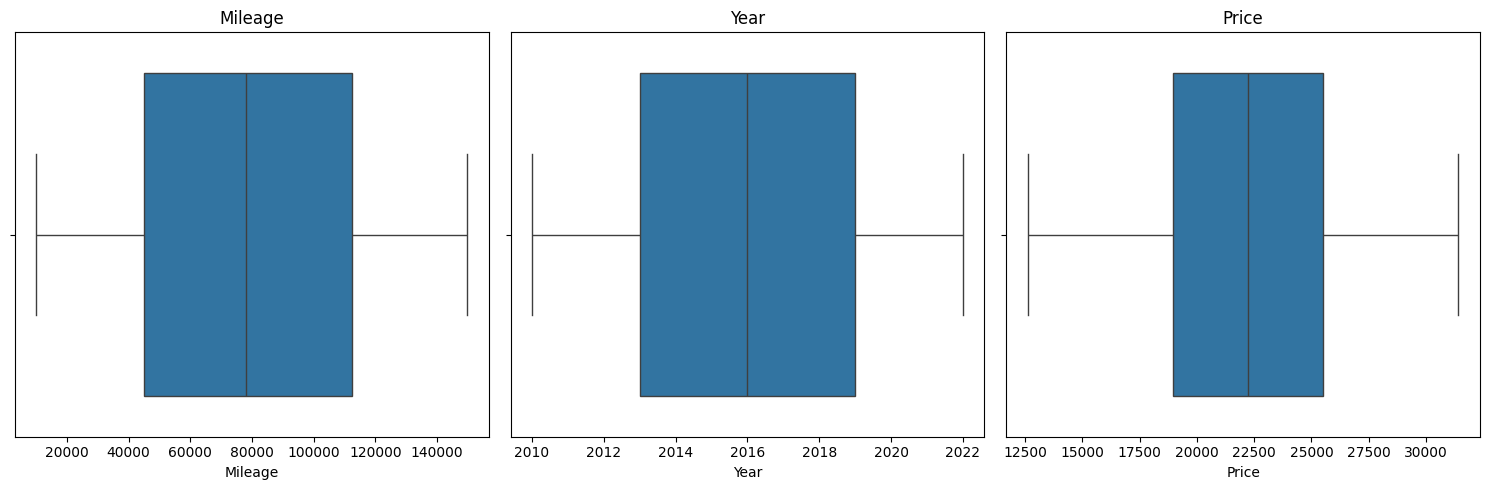

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=carPrices['Mileage'], ax=axes[0])
axes[0].set_title('Mileage')

sns.boxplot(x=carPrices['Year'], ax=axes[1])
axes[1].set_title('Year')

sns.boxplot(x=carPrices['Price'], ax=axes[2])
axes[2].set_title('Price')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas menunjukkan bahwa ketiga fitur numerik (Mileage, Year,
 Price) memiliki distribusi yang relatif normal/simetris

In [62]:
numerical_features = ['Year','Mileage','Price']
categorical_features = ['Make','Model','Condition']

           jumlah sampel  persentase
Make                                
Chevrolet            209        20.9
Toyota               205        20.5
Ford                 199        19.9
Honda                199        19.9
Nissan               188        18.8


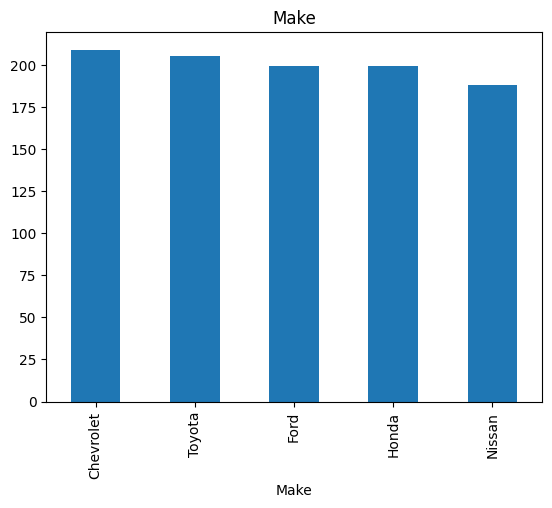

In [63]:
feature = categorical_features[0]
count = carPrices[feature].value_counts()
percent = 100*carPrices[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan Visualisasi diatas menunjukkan bahwa:
*  Chevrolet adalah merek paling umum dalam dataset, disusul oleh Toyota.
*  Ford dan Honda memiliki jumlah yang sama (199 sampel).
*  Nissan merupakan merek dengan frekuensi paling rendah, namun perbedaannya sangat tipis.
*  Distribusi merek cukup merata, masing-masing menyumbang sekitar 18–21% dari total data.

           jumlah sampel  persentase
Model                               
Altima               226        22.6
Camry                212        21.2
Silverado            192        19.2
F-150                188        18.8
Civic                182        18.2


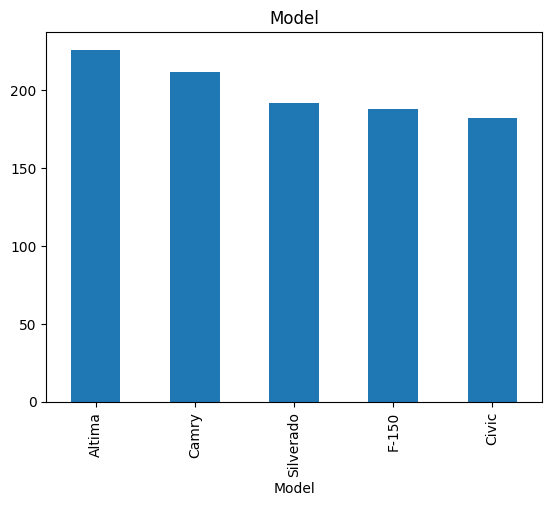

In [64]:
feature = categorical_features[1]
count = carPrices[feature].value_counts()
percent = 100*carPrices[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan visualisasi diatas menunjukkan bahwa:
*  Altima adalah model dengan jumlah sampel terbanyak (226 unit), berkontribusi sekitar 22.6% dari total data.
*  Model lain seperti Camry dan Silverado juga memiliki representasi signifikan di dataset.
*  Distribusi model cukup seimbang sehingga cocok untuk dijadikan fitur dalam pemodelan prediktif, misalnya regresi harga mobil.



           jumlah sampel  persentase
Condition                           
Excellent            595        59.5
Good                 292        29.2
Fair                 113        11.3


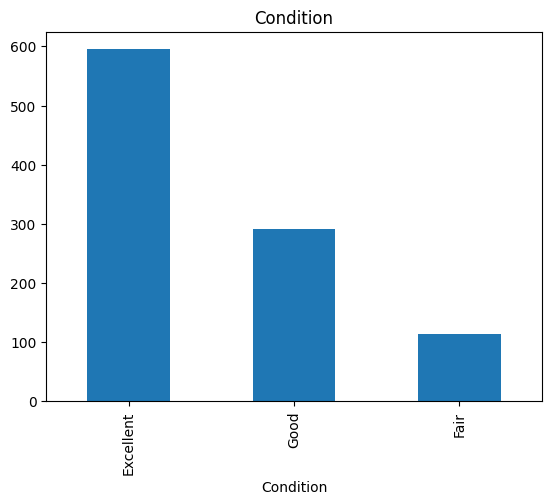

In [65]:
feature = categorical_features[2]
count = carPrices[feature].value_counts()
percent = 100*carPrices[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan visualisasi diatas menunjukkan bahwa:
*  Mayoritas mobil (59.5%) berada dalam kondisi Excellent, menunjukkan bahwa sebagian besar kendaraan dalam dataset ini berada dalam kondisi sangat baik.
*  Hanya 11.3% mobil yang berada dalam kondisi Fair

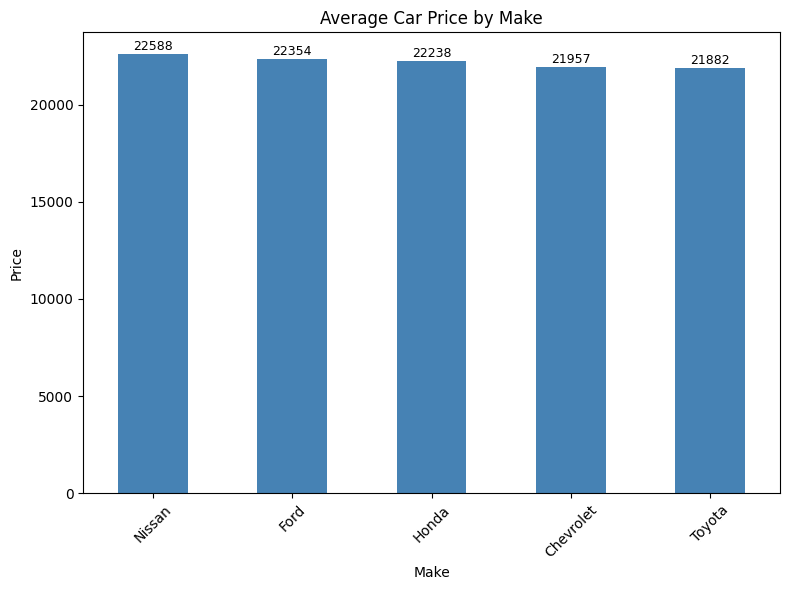

In [66]:
mean_prices = carPrices.groupby('Make')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
bars = mean_prices.plot(kind='bar', color='steelblue')
plt.title('Average Car Price by Make')
plt.ylabel('Price')
plt.xlabel('Make')

for i, v in enumerate(mean_prices):
    plt.text(i, v + 200, f'{v:.0f}', ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


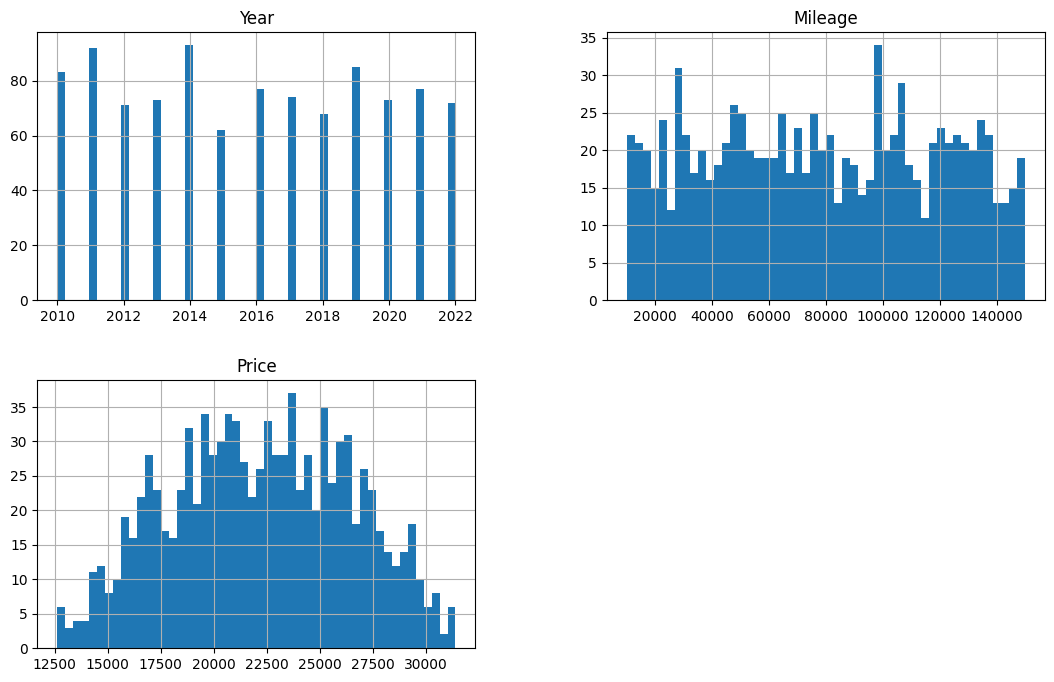

In [67]:
carPrices.hist(bins=50, figsize=(13,8))
plt.show()


*   Pada Fitur Year yang merupakan tahun produksi mobil, menunjukkan distribusi terlihat cukup merata pada tahun 2010 hingga 2022, dengan puncak jumlah kendaraan berapa di tahun 2011 dan 2015.
*   Pada fitur Mileage yang merupakan jarak tempuh mobil, menunjukan bahwa distribusi terlihat cukup menyebar, mulai dari sekitar 10.000 km hingga lebih dari 140.000 km
*   Pada fitur Prices yang merupakan harga mobil, menunjukkan bahwa sebagian besar mobil berada pada kisaran harga pasar menengah


Mengecek Fitur apa saja yang memiliki korelasi dengan price

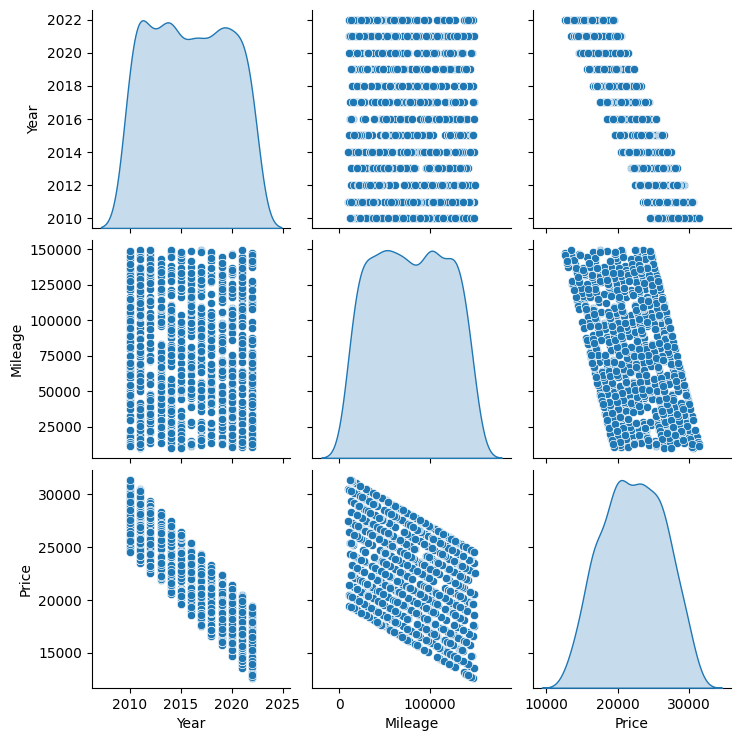

In [68]:
sns.pairplot(carPrices, diag_kind = 'kde')

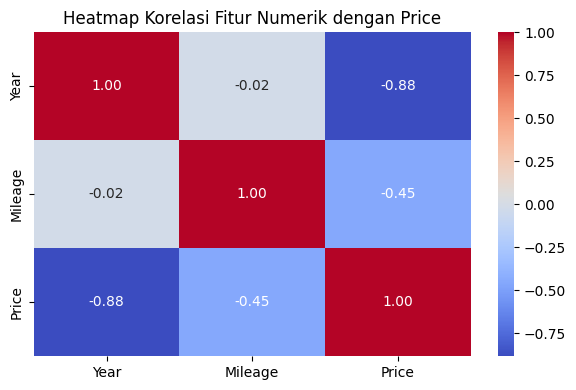

In [69]:
correlation_matrix = carPrices[numerical_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik dengan Price")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi heatmap korelasi diatas menunjukkan bahwa:
*  Fitur Year memiliki pengaruh paling besar terhadap Price, dengan korelasi negatif yang sangat kuat.
* Mileage juga berpengaruh terhadap Price, meskipun tidak sekuat Year.


## Data Preparation

*   **One Hot Encoding** untuk Mengubah fitur kategorikal (berupa teks) menjadi fitur baru yang sesuai sehingga dapat mewakili variabel kategori
*   **Feature target Split** untuk Memisahkan data menjadi dua bagian: fitur (X) dan target prediksi (y).
*   **Split data 80% data train dan 20% data Test** untuk Membagi data menjadi dua subset: data pelatihan (training) dan data pengujian (testing), agar bisa mengukur performa model secara objektif

In [70]:
#One Hot Encoding
carPrices = pd.concat([carPrices, pd.get_dummies(carPrices['Make'], prefix='Make')], axis=1)
carPrices = pd.concat([carPrices, pd.get_dummies(carPrices['Model'], prefix='Model')], axis=1)
carPrices = pd.concat([carPrices, pd.get_dummies(carPrices['Condition'], prefix='Condition')], axis=1)
carPrices.drop(['Make', 'Model', 'Condition'], axis=1, inplace=True)

carPrices.head()

,Year,Mileage,Price,Make_Chevrolet,Make_Ford,Make_Honda,Make_Nissan,Make_Toyota,Model_Altima,Model_Camry,Model_Civic,Model_F-150,Model_Silverado,Condition_Excellent,Condition_Fair,Condition_Good
0,2022,18107,19094.75,False,True,False,False,False,False,False,False,False,True,True,False,False
1,2014,13578,27321.10,False,False,False,False,True,False,False,False,False,True,True,False,False
2,2016,46054,23697.30,True,False,False,False,False,False,False,True,False,False,False,False,True
3,2022,34981,18251.05,False,True,False,False,False,False,False,True,False,False,True,False,False
4,2019,63565,19821.85,True,False,False,False,False,False,False,True,False,False,True,False,False


In [71]:
X = carPrices.drop(columns='Price')
y = carPrices['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Development

*   Linear Regression
*   Random Forest
*   SVR


### Linier Regression

In [72]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression -> R²: {r2_lr:.3f}, RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}")

Linear Regression -> R²: 1.000, RMSE: 0.07, MAE: 0.06


### Random Forest

In [73]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest -> R²: {r2_rf:.3f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

Random Forest -> R²: 0.999, RMSE: 137.20, MAE: 97.71


### Support Vector Regressor (SVR)

In [74]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"SVR -> R²: {r2_svr:.3f}, RMSE: {rmse_svr:.2f}, MAE: {mae_svr:.2f}")

SVR -> R²: 0.009, RMSE: 4480.52, MAE: 3718.96


In [75]:
evaluasi_model = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR'],
    'R² Score': [r2_lr, r2_rf, r2_svr],
    'RMSE': [rmse_lr, rmse_rf, rmse_svr],
    'MAE': [mae_lr, mae_rf, mae_svr]
}

df_evaluasi = pd.DataFrame(evaluasi_model)

print(df_evaluasi)

               Model  R² Score         RMSE          MAE
0  Linear Regression  1.000000     0.069118     0.060029
1      Random Forest  0.999071   137.197834    97.705023
2                SVR  0.009285  4480.515800  3718.962264


Berdasarkan evaluasi menggunakan metrik R2, RMSE, dan MAE, model Linear Regression memiliki performa terbaik dalam memprediksi harga mobil

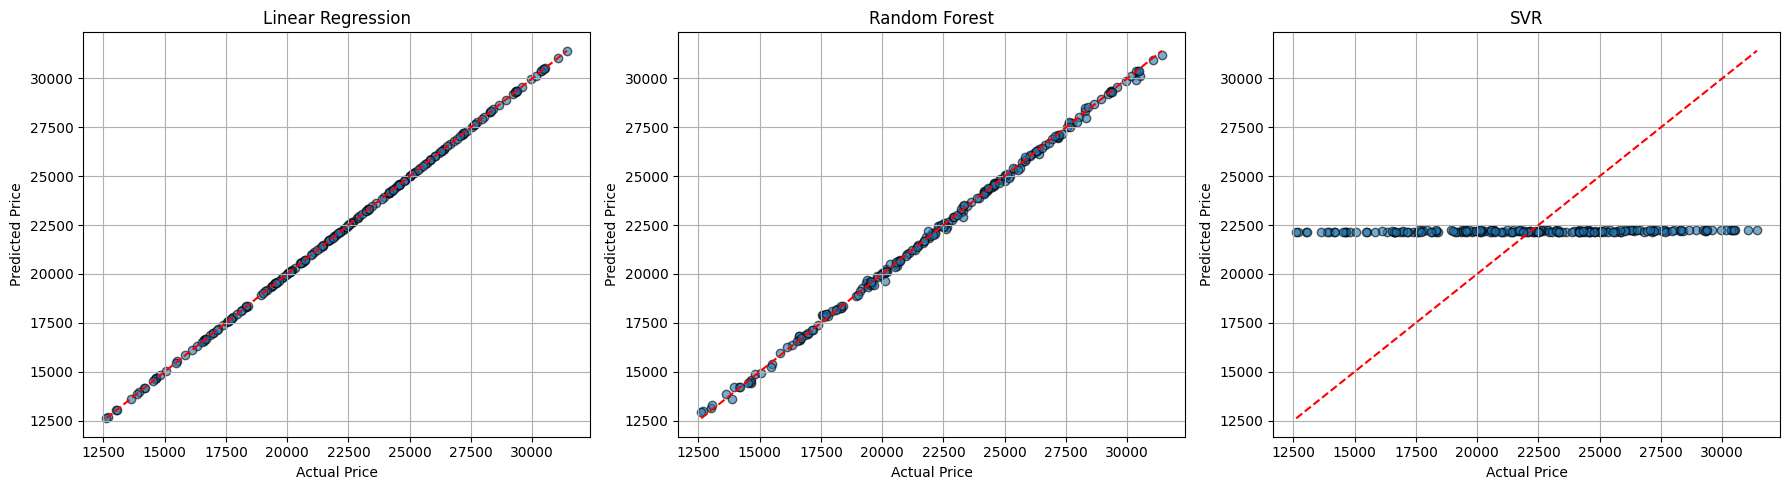

In [76]:
models = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'SVR': y_pred_svr
}

plt.figure(figsize=(18, 5))

for i, (name, y_pred) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(name)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.grid(True)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi dan evaluasi:

*   Linear Regression merupakan model dengan performa terbaik dan paling stabil.
*   Random Forest menunjukkan hasil yang cukup baik, meskipun sedikit lebih menyebar.
*   SVR memerlukan penyesuaian lanjutan sebelum layak digunakan.

### Testing

In [77]:
sample = X_test.iloc[[1]]
actual_price = y_test.iloc[1]

pred_lr = lr_model.predict(sample)[0]
pred_rf = rf_model.predict(sample)[0]
pred_svr = svr_model.predict(sample)[0]

print("=== Prediksi Harga Mobil ===")
print(f"Harga Aktual        : ${actual_price:.2f}")
print(f"Linear Regression   : ${pred_lr:.2f}")
print(f"Random Forest       : ${pred_rf:.2f}")
print(f"Support Vector Reg. : ${pred_svr:.2f}")

=== Prediksi Harga Mobil ===
Harga Aktual        : $24488.75
Linear Regression   : $24488.72
Random Forest       : $24453.32
Support Vector Reg. : $22219.98


Dilakukan Pengujian lebih lanjut untuk memastikan bahwa model bekerja dengan baik dan menunjukkan bahwa prediksi Harga mobil dengan Linier Regression memberikan estimasi yang sangat mendekati nilai aktual, dengan selisih hanya sebesar $0.03